<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/02_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With TensorFlow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


### Create Data

* This data will be used to train the neural network

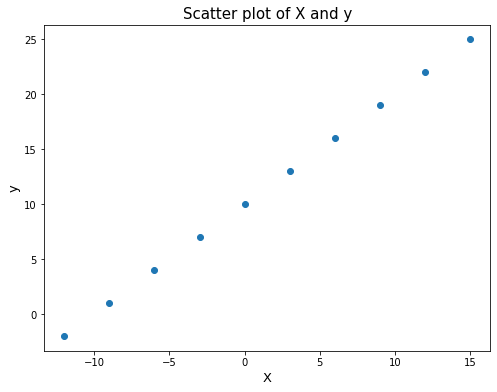

In [2]:
X = np.array([[-12, -9, -6, -3, 0, 3, 6, 9, 12, 15]]) # Row Matrix
y = np.array([-2, 1, 4, 7, 10, 13, 16, 19, 22, 25])


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter plot of X and y", size=15)
plt.show()

In [3]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [4]:
# Convert the NumPy arrays to Tensors
# Cast and reshape X
X = tf.cast(tf.constant(X), dtype=tf.float16)
X = tf.reshape(X, shape=(-1, 1))
y = tf.cast(tf.constant(y), dtype=tf.float16)

X.shape, y.shape

(TensorShape([10, 1]), TensorShape([10]))

### Steps In Modelling With TensorFlow

1. **Create a model**: define the `input`, `hidden` and `output` layers of the deep learning model.
2. **Compile the model**: define the `loss function` (i.e the function that tells our model how wrong it is), the `optimizer` (it tells our model how to improve the patterns its learning) and the `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fit the model**: the model `learns` the `patterns` between the input and the output

#### Create a baseline model


### Some Key Terms

* **Loss**: How wrong the model predictions are (you want to minimize this)
* **Optimizer**: It tells the model how it should update it's parameters to improve its predictions.
* **Metrics**: Human interpretable values for how well the model is performing.
* **Epocs**: This represents the number of times the model will go thru all the training examples.
* **Evaluation** (on unseen data): This tells us how reliable the our model predictions are on unseen data.

In [5]:
# Set seed for reproducibility
SEED = 123
tf.random.set_seed(SEED)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None) # The model has a single neuron

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE: Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # OR 'sgd'
              metrics = ["mae"] # OR tf.keras.losses.mae
              )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 9.2348 - mae: 9.2348
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 9.2023 - mae: 9.2023
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 9.1698 - mae: 9.1698
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 9.1373 - mae: 9.1373
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 9.1048 - mae: 9.1048


In [6]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float16, numpy=
 array([[-12.],
        [ -9.],
        [ -6.],
        [ -3.],
        [  0.],
        [  3.],
        [  6.],
        [  9.],
        [ 12.],
        [ 15.]], dtype=float16)>,
 <tf.Tensor: shape=(10,), dtype=float16, numpy=array([-2.,  1.,  4.,  7., 10., 13., 16., 19., 22., 25.], dtype=float16)>)

In [7]:
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 194ms/step


array([[28.582344]], dtype=float32)

In [8]:
# Since the mae is ~11 on average, let's add 11 to the predicted value
y_pred + 11

array([[39.582344]], dtype=float32)

### Improve The Model

> We can improve the model by altering the steps taken to create the model.

1. **Create model**: We might:
  * Add more layers
  * increase the number of hidden units(neurons)
  * change the activation function

2. **Compile model**: We might:
  * change the optimization function
  * change the learning rate

3. **Fit the model**: We might:
  * increase the number of epochs
  * increase the training data

In [9]:
# Rebuild the model by increasing the number of epochs
tf.random.set_seed(SEED)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (increase the epochs)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 895ms/step - loss: 17.2136 - mae: 17.2136
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 16.7359 - mae: 16.7359
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 16.2582 - mae: 16.2582
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 15.7805 - mae: 15.7805
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 15.3328 - mae: 15.3328
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 15.0043 - mae: 15.0043
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 14.6758 - mae: 14.6758
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 14.3473 - mae: 14.3473
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 14.0188 - mae: 14.0188
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 13.6903 - mae: 13.6903
Epoch 11/100
1/1 [==============================]

In [10]:
# Make predictions
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 229ms/step


array([[25.923616]], dtype=float32)

#### Tweak The Model

* Experiment by changing the `hyperparameters`.
* Add a new layer.

In [11]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation="ReLU"),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])

# Fit model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 739ms/step - loss: 11.8829 - mae: 11.8829
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 11.5420 - mae: 11.5420
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.1831 - mae: 11.1831
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8415 - mae: 10.8415
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 10.5009 - mae: 10.5009
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 10.1513 - mae: 10.1513
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 9.8016 - mae: 9.8016
Epoch 8/100
1/1 [==============================] - 0s 33ms/step - loss: 9.4340 - mae: 9.4340
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 9.0415 - mae: 9.0415
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 8.6453 - mae: 8.6453
Epoch 11/100
1/1 [==============================] - 0s 3

In [12]:
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 347ms/step


array([[32.96692]], dtype=float32)

### Try Using A Different Optimizer

* e.g. Adam

In [13]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation=None),
    tf.keras.layers.Dense(units=1),
])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.0244 - mae: 12.0244
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2983 - mae: 11.2983
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8685 - mae: 10.8685
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 10.5470 - mae: 10.5470
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2304 - mae: 10.2304
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.9121 - mae: 9.9121
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5884 - mae: 9.5884
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 9.2567 - mae: 9.2567
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 8.9152 - mae: 8.9152
Epoch 10/100
1/1 [==============================] - 0s 43ms/step - loss: 8.5622 - mae: 8.5622
Epoch 11/100
1/1 [==============================] - 0s 19ms/s

In [14]:
# Make predictions
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 212ms/step


array([[28.59259]], dtype=float32)

### Evaluate The Model Performance

* It's a good idea to `visualize`.
* We can visualize the following:

  1. Data.
  2. Model.
  3. Model training.
  4. The model predictions.

In [15]:
# Create a bigger data
X = tf.cast(tf.range(-100, 100, 4), dtype=tf.float16)
y = X + 10


# Turn it into a matrix
X = tf.expand_dims(X, axis=-1)


tf.size(X).numpy()

50

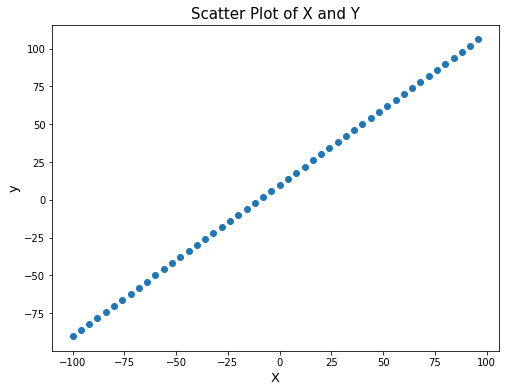

In [16]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)

plt.show()

In [17]:
0.8 * X.shape[0]

40.0

In [18]:
# Split the data
X_train, X_val = X[:40], X[40:]
y_train, y_val = y[:40], y[40:]

X_train.shape, X_val.shape

(TensorShape([40, 1]), TensorShape([10, 1]))

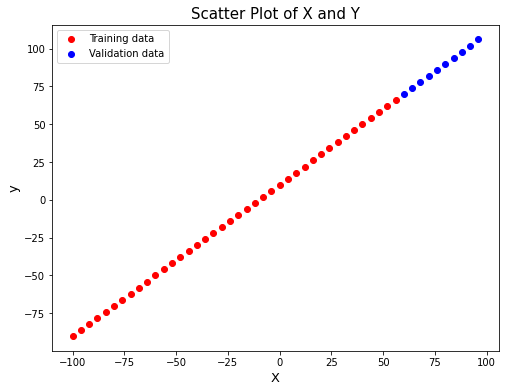

In [19]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X_train, y_train, color="red", label="Training data")
plt.scatter(X_val, y_val, color="blue", label="Validation data")
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)
plt.legend()

plt.show()

### Visualize The Data Split

In [20]:
# from sklearn.model_selection import train_test_split



# RANDOM_STATE, TEST_SIZE = 123, 0.2

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
# X_train.shape, X_val.shape

In [21]:
# Build model (with input shape)
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=None, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer"),
], name="neural_net_1")

# Compile 
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])



In [22]:
# Model Summary
model_2.summary()

Model: "neural_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Some Key Terms
* **Total params**: total number of parameters the model needs to learn.
* **Trainable params**: these are the parameters (patterns) that the model can update as it trains.
* **Non-trainable params**: these parameters are not updated during training. this is typical when you use already learned parameters from other models during training (i.e transfer learning)

In [23]:
# Fit 
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 53.8508 - mae: 53.8508
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 8.8334 - mae: 8.8334
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 41.8129 - mae: 41.8129
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 28.2321 - mae: 28.2321
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 12.5462 - mae: 12.5462
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 17.3927 - mae: 17.3927
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 12.2574 - mae: 12.2574
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 17.9425 - mae: 17.9425
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 10.4034 - mae: 10.4034
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 16.9916 - mae: 16.9916
Epoch 11/100
2/2 [==============================] -

### Visualize The Model

[![image.png](https://i.postimg.cc/XJnBMPTk/image.png)](https://postimg.cc/Lq08Lx4J)

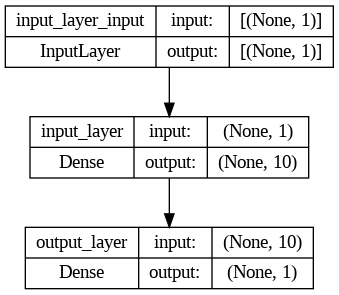

In [24]:
from tensorflow.keras.utils import plot_model


plot_model(model_2, show_shapes=True)

In [25]:
def plot_prediction(X_train=X_train, 
                    X_val=X_val, 
                    y_train=y_train, 
                    y_val=y_val, 
                    y_predictions=y_pred) -> "Plot":
  """This is used to visualize the model predictions.

  Params:
    X_train (tf.tensor): The training data.
    X_val (tf.tensor): The validation data.
    y_train (tf.tensor): The labels of the training data.
    y_train (tf.tensor): The labels of the validation data.
    y_pred (tf.tensor): The predicted data.

  Returns:
    None
  """
  # Visualize the data
  plt.figure(figsize=(8, 6))

  plt.scatter(X_train, y_train, color="red", label="Training data")
  plt.scatter(X_val, y_val, color="blue", label="Validation data")
  plt.scatter(X_val, y_predictions, color="green", label="Predicted data")
  plt.xlabel("X", size=13)
  plt.ylabel("y", size=13)
  plt.title("Scatter Plot of X and Y", size=15)
  plt.legend()

  plt.show()

In [26]:
# Make predictions
y_pred_2 = model_2.predict(X_val)

1/1 [==============================] - 0s 226ms/step


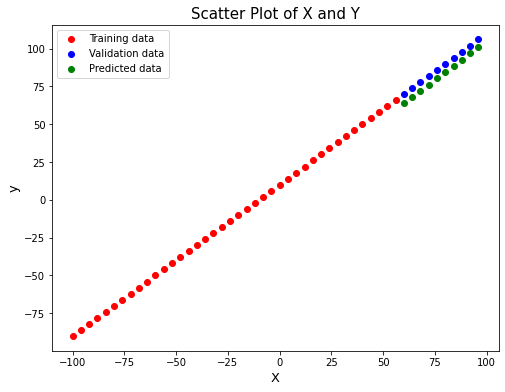

In [27]:
plot_prediction(y_predictions=y_pred_2)

In [28]:
# Evaluate
model_2.evaluate(X_val, y_val)

1/1 [==============================] - 0s 473ms/step - loss: 5.6431 - mae: 5.6431


[5.64305305480957, 5.64305305480957]

### Challenge

> Implement the following:

1. Mean Absolute Error

```python
tf.keras.losses.MAE()

# OR
tf.metrics.mean_absolute_error()
```

$$
mae = \frac{\sum^n_{i=1}{|y_{i}} - \hat{y}_{i}|}{n}
$$

2. Mean Squared Error

```python
tf.keras.losses.MSE()

# OR
tf.metrics.mean_squared_error()
```

$$
mse = \frac{\sum^n_{i=1}{(y_{i}} - \hat{y}_{i})^2}{n}
$$

In [29]:
def mean_absolute_error(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> float:
  """This returns the Mean Absolute Error."""
  mae = tf.math.reduce_mean(tf.math.abs(y_true - tf.squeeze(tf.cast(y_pred, dtype=tf.float16))))
  return mae


def mean_squared_error(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> float:
  """This returns the Mean Squared Error."""
  mse = tf.math.reduce_mean(tf.math.square(y_true - tf.squeeze(tf.cast(y_pred, dtype=tf.float16))))
  return mse



In [30]:
mae_2 = mean_absolute_error(y_true=y_val, y_pred=y_pred_2)
print(mae_2)

mse_2 = mean_squared_error(y_true=y_val, y_pred=y_pred_2)

mse_2

tf.Tensor(5.65, shape=(), dtype=float16)


<tf.Tensor: shape=(), dtype=float16, numpy=32.06>

In [31]:
# OR
tf.keras.losses.MAE(y_true=y_val, y_pred=tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=5.6430507>

In [32]:
# Mean Squared Error
tf.keras.losses.MSE(y_true=y_val, y_pred=tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=32.002655>

#### Build The 3rd Model

* 2 layers 
* 500 epochs

In [33]:
tf.random.set_seed(SEED)

# Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[1], activation=None),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 25ms/step - loss: 38.3285 - mse: 2090.1040
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 24.6869 - mse: 1102.8538
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 30.0046 - mse: 1346.0330
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 20.0481 - mse: 553.9827
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 21.0431 - mse: 617.3826
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 14.7523 - mse: 299.3471
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 21.2278 - mse: 631.9027
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 18.6908 - mse: 470.5292
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 12.1461 - mse: 230.0499
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 15.9122 - mse: 336.8097
Epoch 11/500
2/2 [=====================

In [34]:
# Evaluate model performance
model_3.evaluate(X_val, y_val)

1/1 [==============================] - 0s 199ms/step - loss: 45.1378 - mse: 2086.8491


[45.13776397705078, 2086.84912109375]

In [35]:
# Make predictions
y_pred_3 = model_3.predict(X_val)

1/1 [==============================] - 0s 109ms/step


In [36]:
mae_3 = mean_absolute_error(y_true=y_val, y_pred=y_pred_3)
print(mae_3)

mse_3 = mean_squared_error(y_true=y_val, y_pred=y_pred_3)
mse_3

tf.Tensor(45.16, shape=(), dtype=float16)


<tf.Tensor: shape=(), dtype=float16, numpy=2086.0>

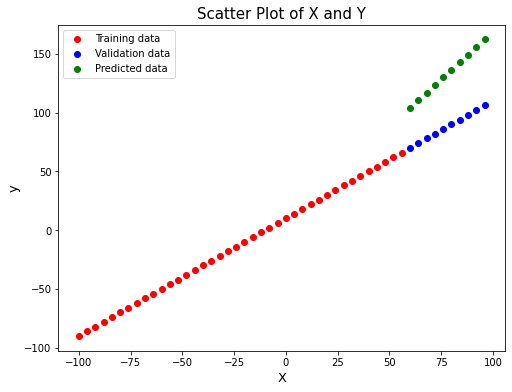

In [37]:
# Visualize the predictions
plot_prediction(y_predictions=y_pred_3)

### Saving TensorFlow Models

1. Using the dafault format: `model.save('my_model')`

2. Using HDF5 format: `model.save('my_model.h5)`

In [38]:
# Save model
model_2.save("model_2")

### Load Model

* `tf.keras.models.load_model('my_model')`

In [39]:
# Load the model
loaded_model_2 = tf.keras.models.load_model("model_2")

In [40]:
# Verify that the models are the same!
load_model_pred_2 = loaded_model_2.predict(X_val)

y_pred_2 == load_model_pred_2

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### How To Download Files From Colab

```python
from google.colab import files

files.download('filepath')
```

## Working With More Data

### The data can be found [here](https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv).

In [41]:
import pandas as pd


# Load data
fp = "https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv"
data = pd.read_csv(fp)
print(f"Shape of data: {data.shape}\n")

data.head()

Shape of data: (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
# Preprocess the data
one_hot_enc_data = pd.get_dummies(data)

one_hot_enc_data.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0


In [43]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "charges"

X = one_hot_enc_data.drop(columns=[TARGET])  # Matrix
y = one_hot_enc_data[TARGET]  # Vector

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_val.shape

((1070, 11), (268, 11))

#### Build 1st Model

* Baseline model

In [44]:
tf.random.set_seed(SEED)

# Build model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=None, input_shape=[X_train.shape[-1]], 
                          name="input_layer"),
    tf.keras.layers.Dense(units=1, activation=None, name="output_layer")
])

# Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8606.1729 - mae: 8606.1729
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7794.2104 - mae: 7794.2104
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7406.5225 - mae: 7406.5225
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7778.6890 - mae: 7778.6890
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7577.2383 - mae: 7577.2383
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7752.4507 - mae: 7752.4507
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7492.3955 - mae: 7492.3955
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7462.4771 - mae: 7462.4771
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7596.9619 - mae: 7596.9619
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.1577 - mae: 7589.1577

In [45]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                120       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Evaluate model
model_1.evaluate(X_val, y_val)

9/9 [==============================] - 0s 3ms/step - loss: 7248.3984 - mae: 7248.3984


[7248.3984375, 7248.3984375]

In [48]:
y_train.describe()

count     1070.000000
mean     13189.257683
std      12043.848125
min       1121.873900
25%       4565.996850
50%       9303.297725
75%      16791.384968
max      62592.873090
Name: charges, dtype: float64

#### Comment

* The baseline model isn't performing too well.
* The **mae** is ~7300 which means that it gets the predictions wrong on average by a value of 7300.
* This isn't good since the median y_train value is **~9300** and this means that we could be charging someone about **2000** when we should actually charge them **9300** 😲

In [47]:
# Make predictions
y_pred_1 = model_1.predict(X_val)

9/9 [==============================] - 0s 2ms/step


### Improve The Model

* Build an improved model by increasing the number of hidden layers / neurons.

In [55]:
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X_train.shape[-1]], 
                          name="input_layer"),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1, name="output_layer")
])

# Compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit/Train
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13136.5586 - mae: 13136.5586
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 12928.8945 - mae: 12928.8945
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12537.6250 - mae: 12537.6250
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 11804.9219 - mae: 11804.9219
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 10613.5889 - mae: 10613.5889
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9149.8555 - mae: 9149.8555
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7941.9102 - mae: 7941.9102
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7451.5244 - mae: 7451.5244
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7384.3550 - mae: 7384.3550
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7358.5498 - mae:

In [56]:
# Evaluate model
model_2.evaluate(X_val, y_val)

9/9 [==============================] - 0s 2ms/step - loss: 4790.7266 - mae: 4790.7266


[4790.7265625, 4790.7265625]

### Build Another Model

* Train with more `epochs`.

In [64]:
tf.random.set_seed(SEED)

# build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X_train.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer"),
    tf.keras.layers.Dense(units=1)
])

# Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Model summary
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               1200      
                                                                 
 hidden_layer (Dense)        (None, 10)                1010      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Fit
history = model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13108.2715 - mae: 13108.2715
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 12916.8125 - mae: 12916.8125
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12527.0654 - mae: 12527.0654
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11790.0518 - mae: 11790.0518
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10609.0752 - mae: 10609.0752
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9189.4316 - mae: 9189.4316
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8010.0933 - mae: 8010.0933
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7498.6118 - mae: 7498.6118
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7416.0449 - mae: 7416.0449
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7390.1309 - mae:

In [66]:
# Evaluate
model_3.evaluate(X_val, y_val)

9/9 [==============================] - 0s 2ms/step - loss: 3560.2207 - mae: 3560.2207


[3560.220703125, 3560.220703125]

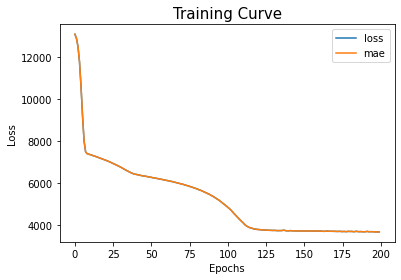

In [70]:
# Plot History (AKA Training Curve)
history_df = pd.DataFrame(history.history)

history_df.plot()
plt.title("Training Curve", size=15)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### How long should I train the model??

* It depends. TensorFlow has a component, `EarlyStopping Callback` which can be added to the model once it stops improving a certain model metric.

### Normalizing And Standardizing Data

* Normalizing
* Standardization